## 单个高斯分布

我们知道一维高斯分布的概率密度函数如下：   

$$
N(x\mid u,\sigma)=\frac{1}{\sqrt{2\pi}\cdot\sigma}exp(-\frac{(x-u)^2}{2\sigma^2})
$$

假如，我们有如下的一堆一维数据点，并且知道它iid采样于某一一维高斯分布，那么该如何求该高斯分布参数呢？即估计高斯参数$u,\sigma$？

### 生成数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.1, 1)

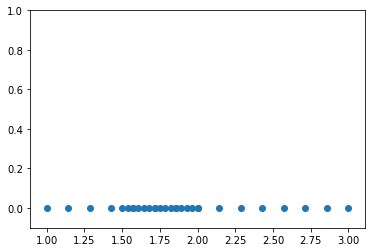

In [2]:
data=np.sort(np.linspace(1,3,15).tolist()+np.linspace(1.5,2,15).tolist())
plt.scatter(data,[0]*len(data))
plt.ylim(-0.1,1)

### 极大似然估计

极大似然估计是一种点估计，它目标函数即似然函数，如下：   

$$
L(u,\sigma)=\prod_{i=1}^MN(x_i\mid u,\sigma)
$$

$M$表示样本量，我们要求解：  

$$
u^*,\sigma^*=arg\max_{u,\sigma}L(u,\sigma)
$$  

可以简单的理解为让样本出现的概率尽可能的大，由于累乘不好计算，通常会对似然函数取对数，将乘号变为加号，这时的目标函数表示如下：   

$$
L(u,\sigma)=log(\prod_{i=1}^Mp(x_i\mid u,\sigma))=-Mlog(\sqrt{2\pi}\cdot\sigma)-\sum_{i=1}^M\frac{(x-u)^2}{2\sigma^2}
$$  

显然取对数后的最优解和取对数前一致，由于极值点必然是导数为0的点，所以，我们分别让$L(u,\sigma)$对$u,\sigma$求偏导，并令其为0，即可得到$u^*,\sigma^*$：  

$$
\frac{\partial L(u,\sigma)}{\partial u}=\frac{1}{\sigma^2}\sum_{i=1}^M(x_i-u)=0\Rightarrow u^*=\frac{\sum_{i=1}^Mx_i}{M}
$$

$$
\frac{\partial L(u,\sigma)}{\partial \sigma}=-M\frac{1}{\sigma}+\sum_{i=1}^M(x-u)^2\sigma^{-3}=0\Rightarrow\sigma^*=\sqrt{\frac{\sum_{i=1}^M(x-u^*)^2}{M}}
$$

结果非常简单且好理解，对于上面的伪数据，我们可以很方便的求解出其高斯分布的参数

In [3]:
#定义一维高斯概率分布函数
def gaussian_1d(x,u,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*np.power(x-u,2)/(2*sigma**2))
u=np.mean(data)
sigma=np.std(data)

(-0.1, 1)

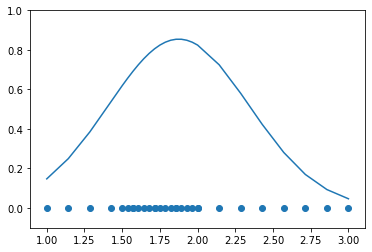

In [4]:
plt.scatter(data,[0]*len(data))
plt.plot(data,gaussian_1d(data,u,sigma))
plt.ylim(-0.1,1)

## 多个高斯分布
可以发现结果比较make sense，数据密集的地方，对应的概率密度也很高，接着我们再造一些数据看看，比如下面，这部分数据明显可以分为两部分，中间有隔断，如果再用一个高斯分布去拟合，其结果就有些牵强了,概率分布高的地方零星只有几个点的数据

(-0.1, 1)

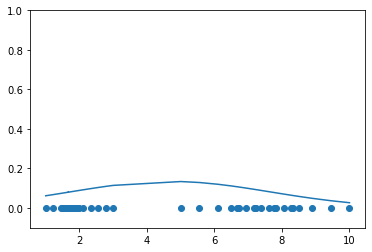

In [5]:
data1=sorted(np.linspace(1,3,10).tolist()+np.linspace(1.5,2,10).tolist())
data2=sorted(np.linspace(5,10,10).tolist()+np.linspace(6.5,8.5,10).tolist())
u=np.mean(data1+data2)
sigma=np.std(data1+data2)
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,gaussian_1d(data1+data2,u,sigma))
plt.ylim(-0.1,1)

既然一个高斯分布不能很好的拟合这些数据，那就多个去拟合？这便是**高斯混合模型**，我们分别构建两个高斯分布去拟合左右两侧的数据看看效果

(-0.1, 1)

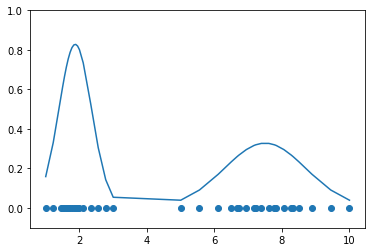

In [6]:
data1=sorted(np.linspace(1,3,10).tolist()+np.linspace(1.5,2,10).tolist())
data2=sorted(np.linspace(5,10,10).tolist()+np.linspace(6.5,8.5,10).tolist())
u1=np.mean(data1)
u2=np.mean(data2)
sigma1=np.std(data1)
sigma2=np.std(data2)
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,gaussian_1d(data1+data2,u1,sigma1)+gaussian_1d(data1+data2,u2,sigma2))
plt.ylim(-0.1,1)

&emsp;&emsp;现在看起来就比较合理了, 该凸的地方凸了,该凹的地方凹了，但这里还有一个问题，如果对该概率分布做积分，其结果为2，因为包含了两个高斯分布，每个高斯分布的积分都为1，所以我们还需要对每个高斯分布的权重进行约束，假设$\alpha_1$为第一个高斯分布的权重，$\alpha_2$为第二个高斯分布的权重，那么，需要满足如下约束：  

$$
\alpha_1+\alpha_2=1,\alpha_1\geq 0,\alpha_2\geq 0
$$  

&emsp;&emsp;我们不妨假设$\alpha_1=0.5,\alpha_2=0.5$，所以一个比较合理的分布如下： 

(-0.1, 1)

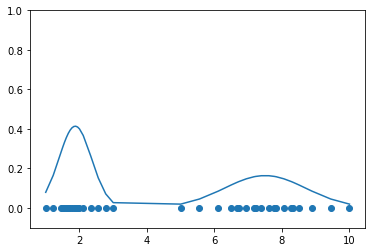

In [7]:
alpha1=0.5
alpha2=0.5
plt.scatter(data1+data2,[0]*len(data1+data2))
plt.plot(data1+data2,alpha1*gaussian_1d(data1+data2,u1,sigma1)+alpha2*gaussian_1d(data1+data2,u2,sigma2))
plt.ylim(-0.1,1)

&emsp;&emsp;到这里，我们通过两个高斯分布去模拟数据的概率分布，并取得了看起来不错的效果，但整个过程都是靠“人”的先验知识去完成的，比如

1. 通过观测数据的分布，人为的选择了两个高斯分布；

2. 一个高斯分布只去学习左侧数据，另一个高斯分布只去学习右侧的数据；

3. 人为的为每个高斯分布的权重设置为0.5，但我们更加希望这个过程是能自动完成的，即自动去学习参数$\theta=\{u_1,\sigma_1,u_2,\sigma_2,\alpha_1\}$，所以让我们从头开始，假设，现在的高斯混合模型为：   

$$
P(x\mid\theta)=\alpha_1N_1(x\mid u_1,\sigma_1)+(1-\alpha_1)N_2(x\mid u_2,\sigma_2)=\sum_{i=1}^2\alpha_iN_i(x\mid u_i,\sigma_i),\alpha_2=1-\alpha_1
$$  

对这些参数的求解，我们同样可以使用最大对数似然估计的方式，所以，损失函数：   

$$
L(\theta)=log(\prod_{i=1}^MP(x_i\mid \theta))=\sum_{i=1}^MlogP(x_i\mid \theta)=\sum_{i=1}^Mlog[\sum_{k=1}^2\alpha_kN_k(x_i\mid u_k,\sigma_k)]
$$  

接下来，按之前的思路，我们分别对各个参数求偏导并令其为0，不是就可以解出最优参数了？可问题是现在很难解...,不信，那下面推导一下损失函数$L(\theta)$对$u_k$的偏导（$k=1,2$）：   

$$
\frac{\partial L(\theta)}{\partial u_k}=\sum_{i=1}^M\frac{\frac{\alpha_k(x_i-u_k)}{\sqrt{2\pi}\sigma_k^3}exp(-\frac{(x_i-u_k)^2}{2\sigma_k^2})}{\sum_{j=1}^2\alpha_jN_j(x_i\mid u_j,\sigma_j)}=0 \Rightarrow 谁能直接算出来，请联系我
$$  

所以，需要转换一种思路去求解，EM是一种迭代逐步优化的思路，它主要分为两步，第一步求期望(E)，第二步对其求极大化(M)，重复执行这两步，直到收敛，即找到一组$\theta^1->\theta^2->,...,->\theta^i$使得$L(\theta^1)<L(\theta^2)<\cdots<L(\theta^i)$，接下来，在下一节介绍EM算法流程

## EM算法求解高斯混合模型

这一节先跳出上一节的具体案例，对其过程做一个抽象的复盘，我们的目标是最大化一个似然函数：   

$$
\theta^*=arg\max_\theta P(X\mid \theta)
$$  

其中$\theta$为模型参数，$X$为可观测数据，但是呢，$P(X\mid\theta)$可能会比较复杂，比如上一节的多个高斯分布的情况，这时，我们可以将$P(X\mid\theta)$拆分为两部分：   

$$
P(X\mid\theta)=\sum_{Z}P(Z\mid\theta)P(X\mid\theta,Z)
$$  

这里$Z$是我们定义的一个辅助变量，它无法被直接观测到，所以称其为隐变量，比如上一节中选择第一个还是第二个高斯模型这个过程便可视为隐变量，上面的等式相当于对$P(X\mid\theta)$做了一个全概率展开（另外需要注意的是，如果$Z$是连续变量，上面的求和符号需要修改为求积分），所以痛点也来了，我们的损失函数一般是对似然函数的对数，如下：   

$$
L(\theta)=logP(X\mid\theta)=log(\sum_{Z}P(Z\mid\theta)P(X\mid\theta,Z))
$$  

接下来，如果直接通过对参数求偏导，并令其为0进行求解将会十分困难，这便是含有隐变量的极大似然估计求解的难点

### EM算法思想

EM的求解思想是寻找一个参数序列，它们能使得似然估计值逐步提升，即：   

$$
\theta^1->\theta^2->,...,->\theta^i\Rightarrow L(\theta^1)<L(\theta^2)<\cdots<L(\theta^i)
$$  

假如，当前轮为第$i$轮，当前的参数为$\theta^i$，那么下一步即是在此基础上找到一个$\theta^{i+1}$使得$L(\theta^{i+1})>L(\theta^i)$；   

按照条件概率公式，我们可以对$P(X\mid\theta)$做如下变换：   

$$
P(X\mid\theta)=\frac{P(X,Z\mid\theta)}{P(Z\mid X,\theta)}
$$
所以：  

$$
L(\theta)=logP(X\mid\theta)=logP(X,Z\mid\theta)-logP(Z\mid X,\theta)
$$  

那么，如何用到上一步$\theta^i$的信息呢？既然上一步学到了$\theta^i$，那么我们可以在此基础上求得一个关于的$Z$的分布，即$P(Z\mid X,\theta^i)$，所以，我们可以求$L(\theta)$在分布$P(Z\mid X,\theta^i)$上的期望：  

$$
\sum_{Z}logP(X\mid\theta)P(Z\mid X,\theta^i)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)-\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)\\
\Rightarrow logP(X\mid\theta)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)-\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)\\
\Rightarrow L(\theta)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)-\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)\\
\Rightarrow L(\theta)=Q(\theta,\theta^i)-H(\theta,\theta^i)
$$

说一下，第一步变换，由于$P(X\mid\theta)$本身与$Z$无关（$Z$是我们为了方便求解而添加的变量），所以：    

$$
\sum_{Z}logP(X\mid\theta)P(Z\mid X,\theta^i)=logP(X\mid\theta)\sum_{Z}P(Z\mid X,\theta^i)=logP(X\mid\theta)
$$  

最后一步是令：   

$$
Q(\theta,\theta^i)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^i)\\
H(\theta,\theta^i)=\sum_{Z}logP(Z\mid X,\theta)P(Z\mid X,\theta^i)
$$

另外一点需要注意的是$\theta$是未知量，$\theta^i$是已知量，到这一步，我们已经能看到下一步优化的方向了，即：  

$$
\theta^{i+1}=arg\max_\theta Q(\theta,\theta^i)-H(\theta,\theta^i)
$$  

但实际求解时只对$Q$函数做极大值求解：  

$$
\theta^{i+1}=arg\max_\theta Q(\theta,\theta^i)
$$  

这是因为，对$H$函数一定有$H(\theta^{i+1},\theta^i)\leq H(\theta^i,\theta^i)$，所以必然能满足$L(\theta^{i+1})\geq L(\theta^i)$，下面对其做证明

### EM收敛性证明
EM的收敛性证明包括两部分，第一部分是$L(\theta)$的收敛性，另一部分是$\theta$的收敛性

1. $L(\theta)$的收敛性
关于$L(\theta)$的收敛性还差上面的$H(\theta^{i+1},\theta^i)\leq H(\theta^i,\theta^i)$没有证明，因为通过$\theta^{i+1}=arg\max_\theta Q(\theta,\theta^i)$的求解，必然有$Q(\theta^{i+1},\theta^i)\geq Q(\theta^i,\theta^i)$，下面对其证明：   

$$
H(\theta^{i+1},\theta^i) - H(\theta^i,\theta^i)=\sum_{Z}(log\frac{P(Z\mid X,\theta^{i+1})}{P(Z\mid X,\theta^i)})P(Z\mid X,\theta^i)\\
\leq log(\sum_Z\frac{P(Z\mid X,\theta^{i+1})}{P(Z\mid X,\theta^i)}P(Z\mid X,\theta^i))\\
=log(\sum_Z P(Z\mid X,\theta^i))=log 1=0
$$

关于第一个不等式，其实用到了Jensen不等式，这可以由凹函数的定义得到，若$f(x)$为凹函数，则$\forall \alpha_1,\alpha_2,...,\alpha_n>0,\sum_{i=1}^n\alpha_i=1,\forall x_i,i=1,2,..,n$，有：   

$$
f(\sum_{i=1}^n x_i)\geq \sum_{i=1}^n\alpha_if(x_i)
$$  

而$log(x)$为凹函数，将上面的$x_j$视作$\frac{P(Z_j\mid X,\theta^{i+1})}{P(Z_j\mid X,\theta^i)}$,$\alpha_j$视作$P(Z_j\mid X,\theta^i)$即可得证，至于凹函数为什么会有这样的性质，就简单画图说明一下，如下，我们在$log(x)$上任意取了两点$x_1,x_2$,它对应的函数值为$log(x_1),log(x_2)$,红色实线即为$(x_1,log(x_1))$与$(x_2,log(x_2))$之间的连线，对任意的$\alpha_1+\alpha_2=1,\alpha_1,\alpha_2>0$假如其组合为$x_i=\alpha_1x_1+\alpha_2x_2$，对其做垂线，与上面的两条线分别相交，与红色实线的交点为$(x_i,\alpha_1log(x_1)+\alpha_2log(x_2))$，与$log(x)$线的交点为$(x_i,log(\alpha_1x_1+\alpha_2x_2))$，从图上结果可以看出$log(\alpha_1x_1+\alpha_2x_2)\geq \alpha_1log(x_1)+\alpha_2log(x_2)$
![avatar](../images/凹函数的性质.png)
到这一步，我们已经证明了$L(\theta^{i+1})\geq L(\theta^i)$，由于$L(\theta)=P(X\mid \theta)$，而$P(X\mid\theta)\leq1$，所以$L(\theta)$有上界，收敛性得证

- $\theta$的收敛性证明

关于这部分就不证明了，直接说下文献《On the Convergence Properties of the EM Algorithm》的证明结论：大部分情况下，$\theta$是收敛的，且收敛于$L(\theta)$的稳定点

- **防坑指南**

（1）算法层面：EM算法只能保证收敛到稳定点，这个点可能会是鞍点；  

（2）损失函数层面：$L(\theta)$不一定保证是凹函数，所以EM算法不一定能收敛到最优的解  

解决方法：多试几组初始参数...  

- **小结**

说了那么多，具体做起来就这两步：  

（1）初始化参数$\theta$；   

（2）求$Q$函数，并对其极大化，更新$\theta$，重复该步骤直到收敛    

下一节，就将EM用到GMM的求解上

 ### EM求解高维高斯函数
 
 到了结合前两节内容并编码实现的环节了，由于实际处理数据往往不是一维数据，所以需要将概率密度函数扩展到高维的情况，定义如下：   
 
 $$
 N(x\mid u,\Sigma)=\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp[-\frac{1}{2}(x-u)^T\Sigma^{-1}(x-u)]
 $$
 
 这里$u$表示均值，$\Sigma$表示协方差矩阵，$|\Sigma|$表示协方差矩阵的行列式，$d$表示$x$的维度，即$x\in R^d$，类比第一节，直接写出它的对数似然函数：   
 
 $$
 L(u,\Sigma)=log(\prod_{i=1}^MN(x_i\mid u,\Sigma))=-\frac{Md}{2}log2\pi-\frac{M}{2}log|\Sigma|-\frac{1}{2}\sum_{i=1}^M(x_i-u)^T\Sigma^{-1}(x_i-u)
 $$   
 
 求最优解的思路也一样，对$u,\Sigma$求偏导并令其为0即可：  

 
 $$
 \frac{\partial L(u,\Sigma)}{\partial u}=\Sigma^{-1}(\sum_{i=1}^M(x_i-u))=0\Rightarrow\sum_{i=1}^M(x_i-u)=0\Rightarrow u^*=\frac{\sum_{i=1}^Mx_i}{M}
 $$  
 
 $$
  \frac{\partial L(u,\Sigma)}{\partial \Sigma}=-\frac{M}{2}\frac{1}{|\Sigma|}|\Sigma|\Sigma^{-1}+\frac{1}{2}\Sigma^{-1}\sum_{i=1}^M[(x_i-u)(x_i-u)^T]\Sigma^{-1}=0\Rightarrow \Sigma=\frac{\sum_{i=1}^M[(x_i-u^*)(x_i-u^*)^T]}{M}
 $$
 
- 补充一下上面要用到的求导公式
 （1）$f(x)=x^TAx\Rightarrow \frac{\partial f(x)}{\partial x}=Ax+A^Tx$；  
 
 （2）$f(A)=|A|\Rightarrow \frac{\partial f(A)}{\partial A}=|A|(A^{-1})^T$；  
 
 （3）$f(A)=x^TAy\Rightarrow \frac{\partial f(A)}{\partial A}=xy^T$；  
 
 （4）$f(A)=A^{-1}\Rightarrow \frac{\partial f(A)}{\partial A_{i,j}}=-A^{-1}\frac{\partial A}{\partial A_{i,j}}A^{-1}$；   
 
 由（3），（4）可推得（注意，下面的$\Sigma$为对称阵）：   
 
 （5）$f(\Sigma)=x^T\Sigma^{-1}x\Rightarrow \frac{\partial f(\Sigma)}{\partial \Sigma_{i,j}}=-x^T\Sigma^{-1}\frac{\partial \Sigma}{\partial \Sigma_{i,j}}\Sigma^{-1}x$，由于$\frac{\partial \Sigma}{\partial \Sigma_{i,j}}$仅在位置$(i,j)$处为1，其余地方为0，所以$\frac{\partial f(\Sigma)}{\partial \Sigma}=-\Sigma^{-1}xx^T\Sigma^{-1}$

接下来造一些数据看看效果

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=np.vstack((np.random.random(size=(50,2))*0.3+[0.3,0.4],np.random.random(size=(50,2))*1.5))

In [9]:
u=np.mean(data,axis=0)
sigma=np.cov(data.T)

In [10]:
#定义高维高斯函数
def gaussian_nd(x,u,sigma):
    return 1.0/(np.power(2*np.pi,x.shape[1]/2)*np.sqrt(np.linalg.det(sigma)))*np.exp(np.sum(-0.5*(x-u).dot(np.linalg.inv(sigma))*(x-u),axis=1))

In [11]:
#封装到utils中
def plot_contourf(data,func,lines=3):
    n = 256
    x = np.linspace(data[:,0].min(), data[:,0].max(), n)
    y = np.linspace(data[:,1].min(), data[:,1].max(), n)
    X, Y = np.meshgrid(x,y)
    C = plt.contour(X,Y, func(np.c_[X.reshape(-1),Y.reshape(-1)]).reshape(X.shape), lines, colors='g', linewidth=0.5)
    plt.clabel(C, inline=True, fontsize=10)
    plt.scatter(data[:,0],data[:,1])

/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


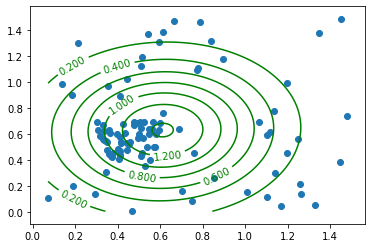

In [12]:
#画高斯图的等高线
plot_contourf(data,lambda x:gaussian_nd(x,u,sigma),8)

### 高斯混合模型

高斯混合模型模型定义与第一节类似，可以定义如下：   

$$
P(X\mid\theta)=\sum_{k=1}^K\alpha_k N(X\mid u_k,\Sigma_k)\\
\alpha_k\geq 0,\sum_{k=1}^K\alpha_k=1\\
\theta=\{\alpha_1,\alpha_2,...,\alpha_K,u_1,u_2,...,u_K,\Sigma_1,\Sigma_2,...,\Sigma_K\}
$$  


这里$K$表示高斯混合模型中高斯模型的数量，$\alpha_k$表示第$k$个高斯模型的权重，由于有$\sum_{k=1}^K\alpha_k=1$的约束，所以$\theta$的自由度还可以少1，比如去掉$\alpha_K$，类似于第一节，我们可以人为的求一组高斯混合模型...

In [13]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, centers=4,cluster_std=0.85, random_state=0)
X = X[:, ::-1]

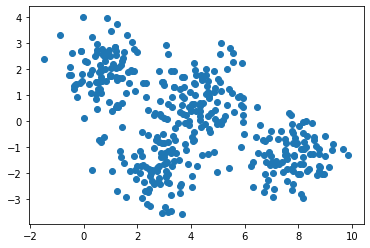

In [14]:
plt.scatter(X[:,0],X[:,1])

In [15]:
theta=[]
for i in range(0,4):
    theta.append((np.mean(X[y==i],axis=0),np.cov(X[y==i].T)))

/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


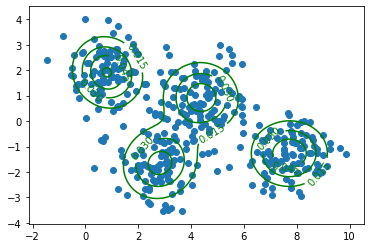

In [16]:
plot_contourf(X,lambda x:np.sum([0.25*gaussian_nd(x,u,sigma) for u,sigma in theta],axis=0),lines=5)

### EM求解GMM模型

上面人工演示了我们想要的结果，接下来实际用EM算法进行求解，而EM求解就是一个极大化$Q$函数的过程：   

$$
Q(\theta,\theta^j)=\sum_{Z}logP(X,Z\mid\theta)P(Z\mid X,\theta^j)
$$

所以根据$Q$函数，我们自然需要确认3个量：      

（1）隐变量$Z$是什么？    

（2）完全数据的对数似然函数$logP(X,Z\mid\theta)$如何求解？   

（3）隐变量在第$j$步的概率分布如何求解$P(Z\mid X,\theta^j)$？

- 隐变量$Z$的确定

我们可以设想观测数据$X_i,i=1,2,...,M$是这样产生的，首先按照概率$\alpha_k(k=1,2,...,K)$选择第$k$个高斯分布分模型$N(X\mid u_k,\Sigma_k)$，然后依第$k$个分模型的概率分布$N(X\mid u_k,\Sigma_k)$生成观测数据$X_i$，由于$X_i$已知（已经被选出），那么$Z$可以表示这个做抉择的过程：   

$$
Z_{i,k}=\left\{\begin{matrix}
1 & 第i个观测来自第k个分模型\\ 
0 & 否则
\end{matrix}\right.,i=1,2,...,M,k=1,2,...,K
$$

- 完全数据的对数似然函数$logP(X,Z\mid \theta)$

那么，对于$Z_{i,k}=1$，即第$i$个观测来源于第$k$个分模型的概率：   
$$
P(X_i,Z_{i,k}\mid \theta)=\alpha_kN(X_i\mid u_k,\Sigma_k)
$$  

所以：  

$$
logP(X_i,Z_{i,k}=1\mid \theta)=log\alpha_k-\frac{d}{2}log2\pi-\frac{1}{2}log|\Sigma_k|-\frac{1}{2}(x_i-u_k)^T\Sigma_k^{-1}(x_i-u_k)
$$

- 隐变量的概率分布$P(Z\mid X,\theta^j)$

在第$j$轮如何求解$Z$的概率分布呢，它的求解可以写作如下：   

$$
P(Z_{i,k}=1\mid X_i,\theta^j)=\frac{\alpha_k^jN(X_i\mid u_k^j,\Sigma_k^j)}{\sum_{l=1}^K\alpha_l^jN(X_i\mid u_l^j,\Sigma_l^j)}=w_{i,k}^j
$$  

这里$\alpha_k^j,u_k^j,\Sigma_k^j$表述第$j$步，第$k$个分模型的参数，这一步如何理解呢？如下图是两个一维混合高斯模型，第一个模型（绿色）参数为$\{\alpha_1,u_1,\Sigma_1\}$ ,第二个模型（红色）参数为$\{\alpha_2,u_2,\Sigma_2\}$，它们的组合的概率分布为黄色线条所示，对于某一点$X_i$,它对应的$Z$的分布，可以理解为各高斯模型概率密度的占比，比如第一个模型的占比为$\frac{a}{a+b}$ ，即$\frac{\alpha_1N(X_i\mid u_1,\Sigma_1)}{\alpha_1N(X_i\mid u_1,\Sigma_1)+\alpha_2N(X_i\mid u_2,\Sigma_2)}$  
![avatar](../images/概率分布.png)

- 极大化Q函数

所以$Q$函数可以表示如下：   

$$
Q(\theta,\theta^j)=-\frac{Md}{2}log2\pi+\sum_{i=1}^M\sum_{k=1}^Kw_{i,k}^j[log\alpha_k-\frac{1}{2}(x_i-u_k)^T\Sigma_k^{-1}(x_i-u_k)-\frac{1}{2}log|\Sigma_k|]\\
s.t. \sum_{k=1}^K\alpha_k=1,\alpha_k\geq0
$$

极大化的过程与之前类似，对$u_k,\Sigma_k$求偏导，并令其为0即可得到$u_k^{j+1},\Sigma_k^{j+1}$：   

$$
u_k^{j+1}=\frac{\sum_{i=1}^Mw_{i,k}^jx_i}{\sum_{i=1}^Mw_{i,k}^j}\\
$$

$$
\Sigma_k^{j+1}=\frac{\sum_{i=1}^Mw_{i,k}^j[(x_i-u_k^j)(x_i-u_k^j)^T]}{\sum_{i=1}^Mw_{i,k}^j}
$$

由于$\alpha_k$有个约束条件，可以通过构造拉格朗日函数来求解，将$\alpha_k$的损失函数单独拎出来并构造其拉格朗日函数：   

$$
L(\alpha_1,\alpha_2,...,\alpha_K,\eta_1,\eta_2,...,\eta_K,\beta)=-\sum_{k=1}^K\sum_{i=1}^Mw_{i,k}^jlog\alpha_k-\sum_{k=1}^K\eta_k\alpha_k+\beta(1-\sum_{k=1}^K\alpha_k)\\
s.t.\eta_k\geq 0,k=1,2,...,K
$$  

求解其KKT条件可得：   

$$
\alpha_k^{j+1}=\frac{\sum_{i=1}^Mw_{i,k}^j}{\sum_{l=1}^K\sum_{i=1}^Mw_{i,l}^j}=\frac{\sum_{i=1}^Mw_{i,k}^j}{M}
$$   

PS：其实拉格朗日函数里面可以不要$\eta_k(k=1,2,...,K)$项，因为$\alpha_k(k=1,2,...,K)$从初始化以及后续更新过程中都有$\alpha_k>0(k=1,2,...,K)$，根据互补松弛条件必然有$\eta_k=0(k=1,2,...,K)$

### 代码实现

In [17]:
import os
os.chdir('../')
import numpy as np
%matplotlib inline

"""
代码封装到ml_models.em下
"""

class GMMCluster(object):
    def __init__(self, n_components=1, tol=1e-5, n_iter=100, verbose=False):
        """
        使用EM训练GMM
        :param n_components: 高斯混合模型数量
        :param tol: -log likehold增益<tol时，停止训练
        :param n_iter: 最多迭代次数
        :param verbose: 是否可视化训练过程
        """
        self.n_components = n_components
        self.tol = tol
        self.n_iter = n_iter
        self.verbose = verbose
        # 高斯模型参数
        self.params = []

    def fit(self, X):
        n_sample, _ = X.shape
        # 初始化参数
        u = np.mean(X, axis=0)
        sigma = np.cov(X.T)
        alpha = 1.0 / self.n_components
        max_value = X.max()
        min_value = X.min()
        for _ in range(0, self.n_components):
            # 每个高斯模型的权重初始化一样
            # 每个高斯模型的均值在整体均值的基础上添加一个随机的bias
            # 方差初始化一样，使用整体的方差
            self.params.append([alpha, u + np.random.random() * (max_value + min_value) / 2, sigma])
        # 计算当前的隐变量
        W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
        # 记录当前的log like hold
        current_log_loss = np.log(W.sum(axis=1)).sum() / n_sample
        W = W / np.sum(W, axis=1, keepdims=True)
        # 迭代训练
        for _ in range(0, self.n_iter):
            if self.verbose is True:
                plot_contourf(X, lambda x: np.sum(
                    [alpha * gaussian_nd(x, u, sigma) for alpha, u, sigma in self.params], axis=0), lines=5)
                plt.pause(0.1)
                plt.clf()
            # 更新高斯模型参数
            for k in range(0, self.n_components):
                self.params[k][0] = W[:, k].sum() / n_sample  # 更新alpha
                self.params[k][1] = np.sum(W[:, [k]] * X, axis=0) / W[:, k].sum()  # 更新均值
                self.params[k][2] = np.sum(
                    [W[i, k] * (X[[i]] - self.params[k][1]).T.dot(X[[i]] - self.params[k][1]) for i in
                     range(0, n_sample)], axis=0) / W[:, k].sum()  # 更新方差
            # 更新当前的隐变量
            W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
            # 计算log like hold
            new_log_loss = np.log(W.sum(axis=1)).sum() / n_sample
            W = W / np.sum(W, axis=1, keepdims=True)
            if new_log_loss - current_log_loss > self.tol:
                current_log_loss = new_log_loss
            else:
                break
        if self.verbose:
            plot_contourf(X, lambda x: np.sum(
                [alpha * gaussian_nd(x, u, sigma) for alpha, u, sigma in self.params], axis=0), lines=5)
            plt.show()

    def predict_proba(self, X):
        # 预测样本在几个高斯模型上的概率分布
        W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
        W = W / np.sum(W, axis=1, keepdims=True)
        return W

    def predict(self, X):
        # 预测样本最有可能产生于那一个高斯模型
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_sample_generate_proba(self, X):
        # 返回样本的生成概率
        W = np.asarray([gaussian_nd(X, u, sigma) * alpha for alpha, u, sigma in self.params]).T
        return np.sum(W, axis=1)

In [18]:
#训练模型
#verbose=True，显示训练过程：请在pycharm中使用，notebook会产生多张图片
gmm = GMMCluster(verbose=False,n_iter=200,n_components=4,tol=1e-5)
gmm.fit(X)

/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


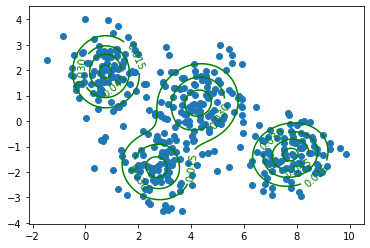

In [19]:
#查看概率分布：可以看到效果与我们人工生成的差不多
plot_contourf(X,gmm.predict_sample_generate_proba,lines=5)

In [20]:
"""
绘制决策边界
"""


def plot_decision_function(X, y, clf, support_vectors=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    # 绘制支持向量
    if support_vectors is not None:
        plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=80, c='none', alpha=0.7, edgecolor='red')


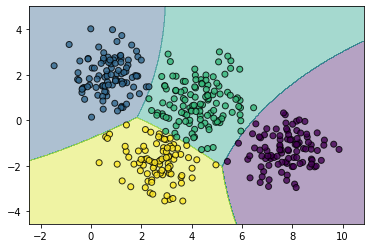

In [21]:
#查看分类边界
plot_decision_function(X,gmm.predict(X),gmm)

显然利用EM进行的无监督训练的GMM可以用于聚类任务，另外GMM用于分类也是可以的，思路同上面第二点一样，只是无需用到EM算法，下一节简单实现一下并作一定的扩展

## EM_GMM分类实现及其与LogisticRegression的关系

首先说明一下，这一节其实与EM没多大关系，只是想对GMM的分类作一个实现并推导它与LogisticRegression之间的关系

### 分类原理

分类实现的原理非常简单，对每一个类训练一个高斯模型模型（如果你喜欢，多个也是可以的，这里你就可以使用用EM算法了，将前面的GMMCluster简单封装一下就可以）即可，然后每个类的权重由其样本所占比例确定

In [22]:
import os
os.chdir('../')
import numpy as np
%matplotlib inline
# from ml_models.em import GMMCluster

"""
利用GMMCluster实现分类，代码封装到ml_models.em
"""

class GMMClassifier(object):
    def __init__(self, cluster_each_class=1, n_iter=100, tol=1e-3, shr_cov=False):
        """
        :param cluster_each_class:每个类需要几个高斯模型去拟合，默认1个
        :param n_iter:迭代次数
        :param tol: -log likehold增益<tol时，停止训练
        :param shr_cov:是否共享协方差矩阵
        """
        self.cluster_each_class = cluster_each_class
        self.n_iter = n_iter
        self.tol = tol
        self.shr_cov = shr_cov
        self.models = []

    def fit(self, X, y):
        for y_index in range(y.max() + 1):
            new_X = X[y == y_index]
            cluster = GMMCluster(n_components=self.cluster_each_class, tol=self.tol, n_iter=self.n_iter)
            cluster.fit(new_X)
            self.models.append(cluster)
        if self.shr_cov:
            # 获取所有的协方差矩阵
            sigmas = []
            for model in self.models:
                params = model.params
                for param in params:
                    sigmas.append(param[2])
            # 求平均
            ave_sigma = np.mean(sigmas, axis=0)
            # 更新
            for model in self.models:
                params = model.params
                for param in params:
                    param[2] = ave_sigma

    def predict_proba(self, X):
        W = np.asarray([model.predict_sample_generate_proba(X) for model in self.models]).T
        W = W / np.sum(W, axis=1, keepdims=True)
        return W

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [23]:
#造数据
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
#from ml_models import utils

X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.85, random_state=0)
X = X[:, ::-1]

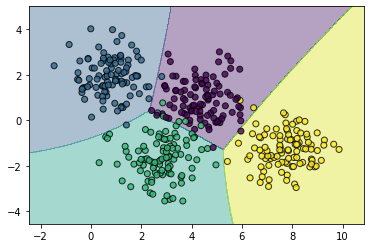

In [24]:
#训练模型并可视化
gmm = GMMClassifier(n_iter=100)
gmm.fit(X, y)
plot_decision_function(X, y, gmm)

代码里面添加了一个`shr_cov`的超参，如果`shr_cov=True`表示所有的模型都会共享同一个协方差矩阵，我们接下来看看会发生什么

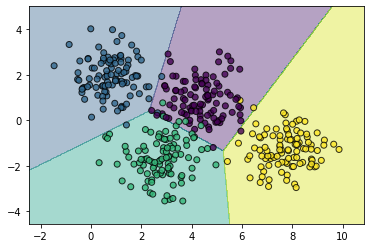

In [25]:
gmm = GMMClassifier(n_iter=100,shr_cov=True)
gmm.fit(X, y)
plot_decision_function(X, y, gmm)

可以发现类与类的边界都变成了**直线**，这时的GMM模型似乎退化成了一个线性模型，这是为什么呢？它这时其实是一个带有一定约束的LogisticRegression模型，接下来我们推推看它们之间的关系

### 协方差矩阵共享的GMM模型与LogisticRegression的关系

以二分类为例进行推导，假如我们训练好了两个分类模型，分别为$C_1,C_2$，那么有：   

$$
p(x\mid C_1)=N(x\mid u_1,\Sigma)\\
p(x\mid C_2)=N(x\mid u_2,\Sigma)\\
p(C_1)+p(C_2)=1
$$   
所以，高斯混合模型：   

$$
p(x)=p(C_1)p(x\mid C_1)+p(C_2)p(x\mid C_2)
$$  

接下来，我们转换为判断模型的形式：   

$$
p(C_1\mid x)=\frac{p(C_1)p(x\mid C_1)}{p(x)}\\
=\frac{p(C_1)p(x\mid C_1)}{p(C_1)p(x\mid C_1)+p(C_2)p(x\mid C_2)}\\
=\frac{1}{1+exp(-Z)}
$$   

这里$Z=log\frac{p(C_1)p(x\mid C_1)}{p(C_2)p(x\mid C_2)}$，这里已经看到了LogisticRegression的雏形了，接着，我们将$Z$化简看看：  

$$
Z=log\frac{p(C_1)p(x\mid C_1)}{p(C_2)p(x\mid C_2)}\\
=log\frac{p(x\mid C_1)}{p(x\mid C_2)}+log\frac{p(C_1)}{p(C_2)}\\
=....省略....\\
=(u_1-u_2)^T\Sigma^{-1}x-\frac{1}{2}u_1^T\Sigma^{-1}u_1+\frac{1}{2}u_2^T\Sigma^{-1}u_2+log\frac{N_1}{N_2}(N_1,N_2表示1,2类的样本量\frac{p(C_1)}{p(C_2)}=\frac{N_1}{N_2})
$$  

所以，如果令：  
$$
w^T=(u_1-u_2)^T\Sigma^{-1}\\
b=-\frac{1}{2}u_1^T\Sigma^{-1}u_1+\frac{1}{2}u_2^T\Sigma^{-1}u_2+log\frac{N_1}{N_2}
$$  

那么：  

$$
Z=w^Tx+b
$$  

那么：  

$$
p(C_1\mid x)=\frac{1}{1+exp(-w^Tx-b)}
$$  

所以，如果数据量大没必要去训练一个复杂的GMM分类器，就训练一个LR就好啦...